In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def rmsle(y_true,y_pred):
   assert len(y_true) == len(y_pred)
   return np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean() ** 0.5

def MaxMinNorm10(df, df_scale):
    df_nom = ((df - df_scale.min())/(df_scale.max()-df_scale.min()))*10
    return df_nom
def DrawBar(data_name):
    d_bar = hsData.pivot_table(index=data_name, values="SalePrice", aggfunc=np.median)

    d_bar_sorted = d_bar.sort_values(by="SalePrice")
    d_bar_sorted.plot(kind="bar", color="blue")

    plt.xlabel(data_name)
    plt.ylabel('SalePrice')
    plt.show()
    
    print('Count of Values')
    print hsData[data_name].value_counts()
    print('\nPercentage of Values')
    print hsData[data_name].value_counts()/hsData[data_name].count()
    
    
    d_size = d_bar_sorted.size
    idStr = d_bar_sorted.iloc[:d_size].index
    idVal = d_bar_sorted.values
        
    strIdx = '['
    for ele in idStr:
        if len(strIdx) > 2:
            strIdx += ','    
        strIdx += "\'"
        strIdx += str(ele)
        strIdx += "\'"

    strIdx += ']'
    print strIdx

    strVal = '['
    for ele in idVal:
        if len(strVal) > 2:
            strVal += ','          
        strVal += str(int(ele))
    strVal +=']'
        
    print strVal

In [27]:
tData = pd.Series([10,10,10,10,10,10,10,10,10,10])
modA = pd.Series([11,11,11,11,11,11,11,11,11,21])
modB = pd.Series([12,12,12,12,12,12,12,12,12,12])

print rmsle(tData, modA)
print rmsle(tData, modB)

0.234220373035
0.167054084663


In [71]:
train_file = "c:\\kaggle\\house\\train.csv"
hsData = pd.read_csv(train_file, header = 0)

#hsData.info()
hsData.describe(include=[np.number])
#hsData['GarageYrBlt'].describe(include=[np.number])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In following cells, demo GrLivArea with raw, log and square

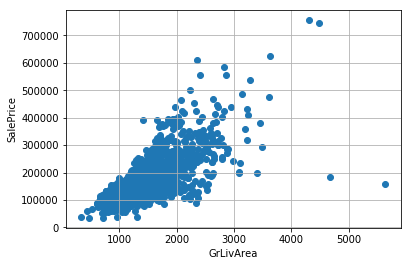

In [30]:
plt.scatter(x=hsData["GrLivArea"], y=hsData["SalePrice"])
plt.grid(True)
plt.ylabel("SalePrice")
plt.xlabel("GrLivArea")
plt.show()

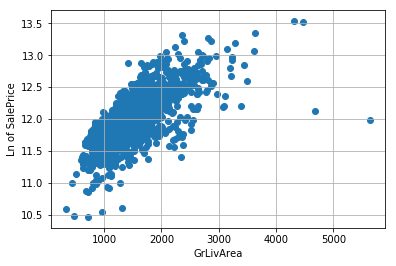

In [38]:
plt.scatter(x=hsData["GrLivArea"], y=np.log(hsData["SalePrice"]))
plt.grid(True)
plt.ylabel("Ln of SalePrice")
plt.xlabel("GrLivArea")
plt.show()

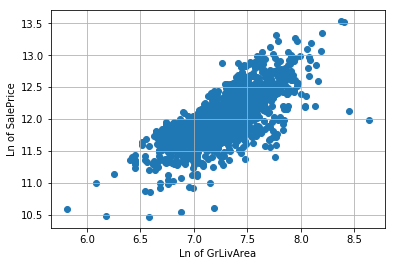

In [39]:
plt.scatter(x=np.log(hsData["GrLivArea"]), y=np.log(hsData["SalePrice"]))
plt.grid(True)
plt.ylabel("Ln of SalePrice")
plt.xlabel("Ln of GrLivArea")
plt.show()

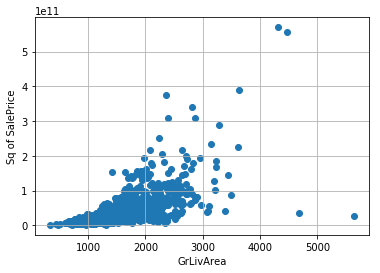

In [40]:
plt.scatter(x=hsData["GrLivArea"], y=np.square(hsData["SalePrice"]))
plt.grid(True)
plt.ylabel("Sq of SalePrice")
plt.xlabel("GrLivArea")
plt.show()

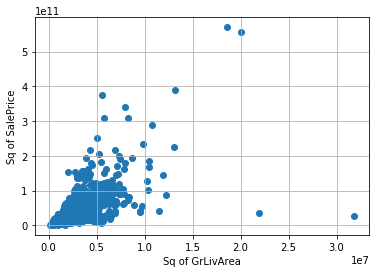

In [41]:
plt.scatter(x=np.square(hsData["GrLivArea"]), y=np.square(hsData["SalePrice"]))
plt.grid(True)
plt.ylabel("Sq of SalePrice")
plt.xlabel("Sq of GrLivArea")
plt.show()

In followings cells, demo how to trim GrLivArea (3500, 4000)

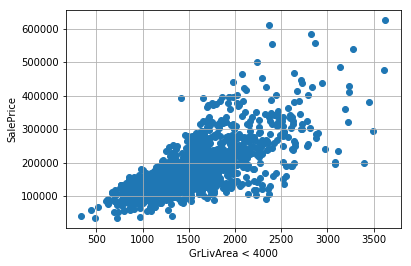

In [72]:
hsData_lv_trim = hsData.copy()
hsData_lv_trim = hsData[hsData["GrLivArea"] < 4000]
plt.scatter(x=hsData_lv_trim["GrLivArea"], y=hsData_lv_trim["SalePrice"])
plt.grid(True)
plt.ylabel("SalePrice")
plt.xlabel("GrLivArea < 4000")
plt.show()

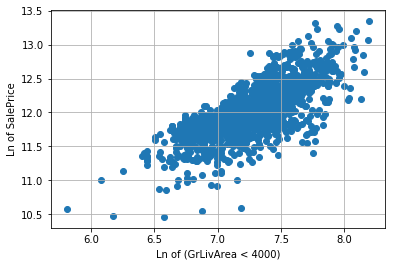

In [84]:
hsData_lv_trim = hsData.copy()
hsData_lv_trim = hsData[hsData["GrLivArea"] < 4000]
plt.scatter(x=np.log(hsData_lv_trim["GrLivArea"]), y=np.log(hsData_lv_trim["SalePrice"]))
plt.grid(True)
plt.ylabel("Ln of SalePrice")
plt.xlabel("Ln of (GrLivArea < 4000)")
plt.show()

Demo how LotArea affect data

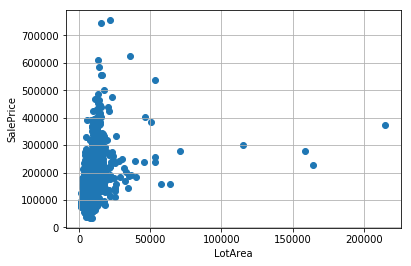

In [85]:
plt.scatter(x=hsData["LotArea"], y=hsData["SalePrice"])
plt.grid(True)
plt.ylabel("SalePrice")
plt.xlabel("LotArea")
plt.show()

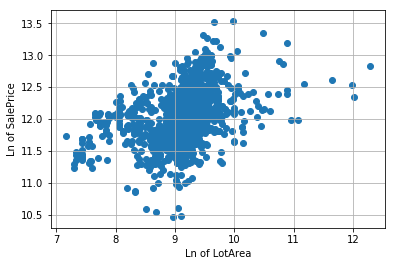

In [86]:
plt.scatter(x=np.log(hsData["LotArea"]), y=np.log(hsData["SalePrice"]))
plt.grid(True)
plt.ylabel("Ln of SalePrice")
plt.xlabel("Ln of LotArea")
plt.show()

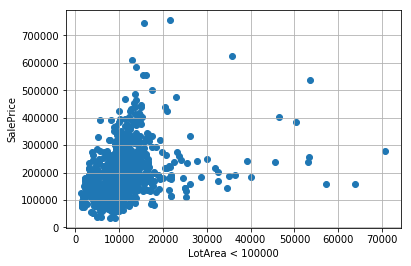

In [87]:
hsData_lv_trim = hsData.copy()
hsData_lv_trim = hsData[hsData["LotArea"] < 100000]
plt.scatter(x=hsData_lv_trim["LotArea"], y=hsData_lv_trim["SalePrice"])
plt.grid(True)
plt.ylabel("SalePrice")
plt.xlabel("LotArea < 100000")
plt.show()

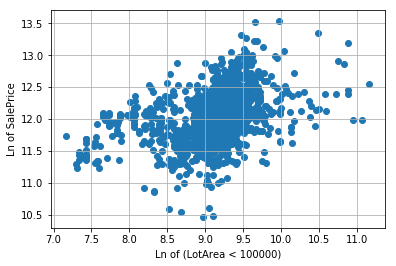

In [88]:
hsData_lv_trim = hsData.copy()
hsData_lv_trim = hsData[hsData["LotArea"] < 100000]
plt.scatter(x=np.log(hsData_lv_trim["LotArea"]), y=np.log(hsData_lv_trim["SalePrice"]))
plt.grid(True)
plt.ylabel("Ln of SalePrice")
plt.xlabel("Ln of (LotArea < 100000)")
plt.show()

Demo GarageYrBlt with 0 data

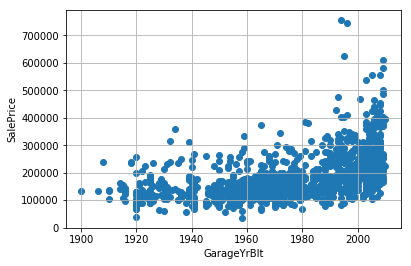

In [89]:
plt.scatter(x=hsData["GarageYrBlt"], y=hsData["SalePrice"])
plt.grid(True)
plt.ylabel("SalePrice")
plt.xlabel("GarageYrBlt")
plt.show()

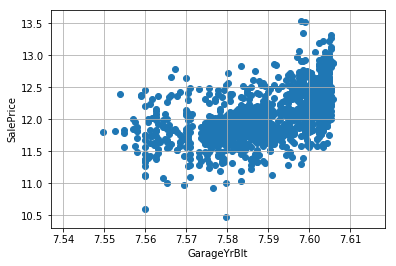

In [90]:
plt.scatter(x=np.log(hsData["GarageYrBlt"]), y=np.log(hsData["SalePrice"]))
plt.grid(True)
plt.ylabel("SalePrice")
plt.xlabel("GarageYrBlt")
plt.show()

In [92]:
hsGarageYrBlt = MaxMinNorm10(hsData["GarageYrBlt"], hsData["GarageYrBlt"])

#print GarageYrBlt

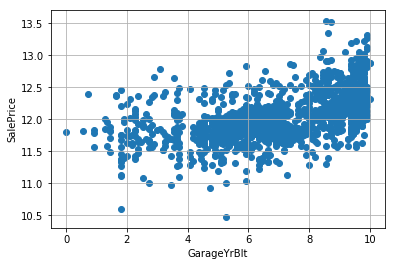

In [94]:
plt.scatter(x=hsGarageYrBlt, y=np.log(hsData["SalePrice"]))
plt.grid(True)
plt.ylabel("SalePrice")
plt.xlabel("GarageYrBlt")
plt.show()

Demo Label Encoder and One-Hot Encoder for Condition1

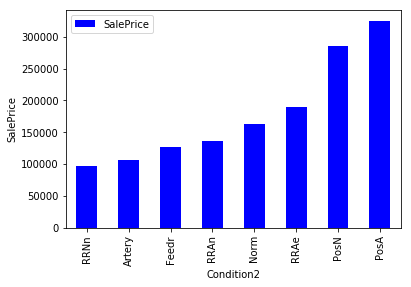

Count of Values
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

Percentage of Values
Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
RRAn      0.000685
RRAe      0.000685
PosA      0.000685
Name: Condition2, dtype: float64
['RRNn','Artery','Feedr','RRAn','Norm','RRAe','PosN','PosA']
[96750,106500,127500,136905,163500,190000,284875,325000]


In [120]:
DrawBar('Condition2')

In [114]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(hsData['Condition1'])
condition1_label = label_encoder.transform(hsData['Condition1'])

#print conditiona1_label[0:30]
#print hsData['Condition1'].iloc[:30]

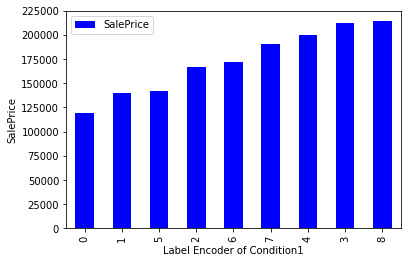

In [115]:
d_bar = hsData.pivot_table(index=condition1_label, values="SalePrice", aggfunc=np.median)

d_bar_sorted = d_bar.sort_values(by="SalePrice")
d_bar_sorted.plot(kind="bar", color="blue")

plt.xlabel('Label Encoder of Condition1')
plt.ylabel('SalePrice')
plt.show()

In [119]:
pd.get_dummies(hsData['Condition1'])

,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn
0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0
8,1,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0
